In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [ ]:
#Cargamos la imagen deseada
img = cv2.imread("inclinada1.jpg")

#Indicamos la escala a la que se reducirá.... 1/scale
scale = 0.5
#Escalamos la imagen
img_rs = cv2.resize(img, None, fx=1./scale, fy=1./scale, interpolation=cv2.INTER_LANCZOS4)

print ("Tamaño de imagen: \nimg: ",img.shape," img_rs: ", img_rs.shape)
b,g,r = cv2.split(img_rs)
img_rs = cv2.merge([r,g,b])

plt.imshow(img_rs),plt.title('Original escalada')

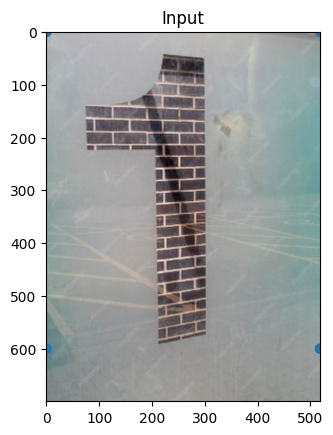

In [27]:
#Homografía
rows = img_rs.shape[0]; cols = img_rs.shape[1]

#Seleccionamos cuatro puntos usando un arreglo de numpy
pts1 = np.float32([[0,0],[0,600],[cols,0],[cols,600]])

#Mostramos la imagen escalada
fig,ax = plt.subplots(1)
ax.imshow(img_rs),plt.title('Input')

#Dibujamos pts1 en la imagen escalada
for pts in pts1:
    circ = plt.Circle(pts,10)
    ax.add_patch(circ)

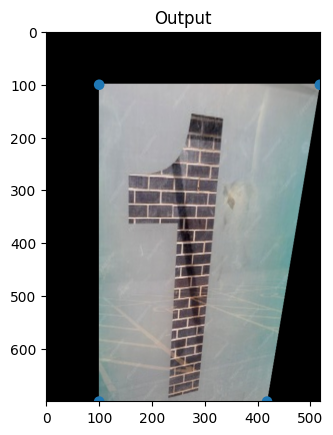

In [36]:
#Seleccionamos cuatro puntos de destino
x = 100
pts2 = np.float32([[100,100],[x,rows],[cols,100],[cols-x,rows]])

#Se calcula la matriz para la corrección de perspectiva
M = cv2.getPerspectiveTransform(pts1,pts2)

#Obtenemos la imagen con corrección de pespectiva
img_hom = cv2.warpPerspective(img_rs, M, (cols,rows))

#Mostramos la imagen resultante
fig1,ax1 = plt.subplots(1)
ax1.imshow(img_hom),plt.title('Output')

#Dibujamos pts2
for pts in pts2:
    circ = plt.Circle(pts,10)
    ax1.add_patch(circ)